In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
import xgboost as xgb
import lightgbm as lgb

In [2]:
well_train_svm = pd.read_csv("well_train_svm.csv")  
well_test =  pd.read_csv("well_test.csv")
well_train_norm = pd.read_csv("well_train_norm.csv")
well_1 = pd.read_csv("wellx1.csv")
well_2 = pd.read_csv("wellx2.csv")
well_3 = pd.read_csv("wellx3.csv")
well_4 = pd.read_csv("wellx4.csv")
well_5 = pd.read_csv("wellx5.csv")
well_test = pd.read_csv("well_test.csv")

Define the train data as the SVM outlier-removed-data 

In [3]:
feature = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']
target = 'DT'

train_set = well_train_svm[feature].values
target_set = well_train_svm[target].values

Define the test data as the copy of normalized data (before outlier-removed)

In [4]:
well_data = well_train_norm.copy()

train_well_name = ['15_9-F-11A', '15_9-F-1A', '15_9-F-1B']

X_test = []
target_test = []
for i in range(len(train_well_name)):
    # split the data with respect to well name
    test = well_data.loc[well_data['WELL_ID'] == train_well_name[i]]

    # Drop well name column 
    test = test.drop(['WELL_ID'], axis=1)
    # define X_test (feature) and y_test (target)
    X_test_, y_test_ = test[feature].values, test[target].values

    X_test.append(X_test_)
    target_test.append(y_test_)


Fit regression models to train data and predict to test data

In [5]:

def train_model(estimator,estimator_name,test_wells,test_targets):
    print(estimator_name+":")
    well_1_test, well_3_test, well_4_test = test_wells 
    well_1_target, well_3_target, well_4_target = target_test
    # Fit the regressor to the training data
    estimator.fit(train_set, target_set)
    print("====================================\n")
    # Predict on well 1
    y_pred1 = estimator.predict(well_1_test)
    print("R-squared of Well 1: {}".format(estimator.score(well_1_test, well_1_target)))
    rmse = np.sqrt(mean_squared_error(well_1_target, y_pred1))
    print("RMSE of Well 1: {}".format(rmse))
    print("====================================\n")
    # Predict on well 3
    y_pred3 = estimator.predict(well_3_test)
    print("R-squared of Well 3: {}".format(estimator.score(well_3_test, well_3_target)))
    rmse = np.sqrt(mean_squared_error(well_3_target, y_pred3))
    print("RMSE of Well 3: {}".format(rmse))
    print("====================================\n")
    # Predict on well 4
    y_pred4 = estimator.predict(well_4_test)
    print("R-squared of Well 4: {}".format(estimator.score(well_4_test, well_4_target)))
    rmse = np.sqrt(mean_squared_error(well_4_target, y_pred4))
    print("RMSE of Well 4: {}".format(rmse))
    return y_pred1,y_pred3,y_pred4
GBM_model = GradientBoostingRegressor(random_state=34,max_depth = 10,n_estimators= 1300)

well_pred1,well_pred3,well_pred4 = train_model(GBM_model,"Gradient Boosting Regressor",X_test,target_test)

Gradient Boosting Regressor:

R-squared of Well 1: 0.9830025794250369
RMSE of Well 1: 0.14004260500919832

R-squared of Well 3: 0.9872992312016515
RMSE of Well 3: 0.10422671666522575

R-squared of Well 4: 0.9583992031061879
RMSE of Well 4: 0.15541741925537475


In [9]:
Ada_model =  AdaBoostRegressor(random_state=24)
well_pred1,well_pred3,well_pred4 = train_model( Ada_model,"AdaBoost Regressor",X_test,target_test)

AdaBoost Regressor:

R-squared of Well 1: 0.9032853622519791
RMSE of Well 1: 0.33405253762005627

R-squared of Well 3: 0.9012926201726925
RMSE of Well 3: 0.2905620317417079

R-squared of Well 4: 0.7692761568837618
RMSE of Well 4: 0.3660118165687119


In [10]:
linear_model = LinearRegression()
well_pred1,well_pred3,well_pred4 = train_model( linear_model,"linear Regressor",X_test,target_test)

linear Regressor:

R-squared of Well 1: 0.9333657769815956
RMSE of Well 1: 0.2772792300945421

R-squared of Well 3: 0.9196785191239192
RMSE of Well 3: 0.26210777585819917

R-squared of Well 4: 0.805626578694564
RMSE of Well 4: 0.33594432390830126


In [11]:
Rf_model =  RandomForestRegressor(random_state=46,n_estimators=700)
well_pred1,well_pred3,well_pred4 = train_model( Rf_model,"RandomForest Regressor",X_test,target_test)

RandomForest Regressor:

R-squared of Well 1: 0.9802756435640092
RMSE of Well 1: 0.15085860639829918

R-squared of Well 3: 0.9851093102669416
RMSE of Well 3: 0.11285516993750257

R-squared of Well 4: 0.9555697770012999
RMSE of Well 4: 0.16061574432311657


In [6]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [ ]:
# Using a random sample of the dataframe for better time computation
X_sampled = train_set.sample(1000, random_state=10)
explainer = shap.TreeExplainer(GBM_model)
shap_values = explainer.shap_values(train_set)
shap_values = explainer.shap_values(X_sampled)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, features= X_sampled, feature_names=feature, plot_type="bar")
plt.savefig('grafic.png')

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
well_train = pd.read_csv('well_train.csv')
# Normalize features using power transform (Yeo-Johnson method)
scaler = PowerTransformer(method='yeo-johnson')

well_1_target, well_3_target, well_4_target = target_test
# make the transformer fit to the target
y = well_train[target].values
scaler.fit(y.reshape(-1,1))

# denormalize predict logs and true logs
well_1_target, well_pred1 = scaler.inverse_transform(well_1_target.reshape(-1,1)), scaler.inverse_transform(well_1_target.reshape(-1,1))
well_3_target, well_pred3 = scaler.inverse_transform(well_3_target.reshape(-1,1)), scaler.inverse_transform(well_3_target.reshape(-1,1))
well_4_target, well_pred4 = scaler.inverse_transform(well_4_target.reshape(-1,1)), scaler.inverse_transform(well_4_target.reshape(-1,1))

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_5972/159844302.py:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


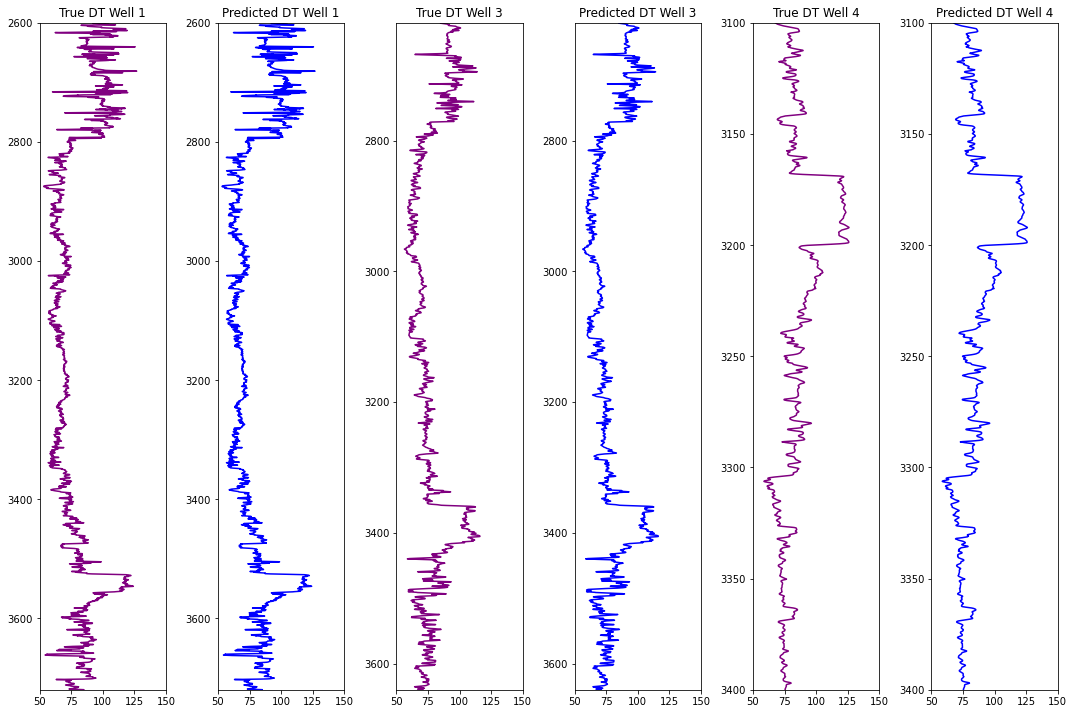

In [13]:
x = [well_1_target, well_pred1,well_3_target, well_pred3,well_4_target, well_pred4]

y = [well_1['DEPTH'], well_1['DEPTH'], well_3['DEPTH'], well_3['DEPTH'], well_4['DEPTH'], well_4['DEPTH']]

color = ['purple', 'blue', 'purple', 'blue', 'purple', 'blue']
title = ['True DT Well 1', 'Predicted DT Well 1', 'True DT Well 3', 'Predicted DT Well 3',
         'True DT Well 4', 'Predicted DT Well 4']

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i in range(len(x)):
  ax[i].plot(x[i], y[i], color=color[i])
  ax[i].set_xlim(50, 150)
  ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
  ax[i].set_title(title[i])

plt.tight_layout(1)

plt.show()

## Use-case: Predict for wells for which they are no recorded P-sonic logs using other well logs.

In [14]:
# Define the well data 
test_well = ['15_9-F-11B', '15_9-F-1C']

X_test = []
y_test = []
depths = []
for i in range(len(test_well)):
  # split the df with respect to its name
  test = well_test.loc[well_test['WELL_ID'] == test_well[i]]

  # Drop well name column 
  test = test.drop(['WELL_ID'], axis=1)

  # define X_test (feature)
  X_test_ = test[feature].values

  # define depth
  depth_ = test['DEPTH'].values
  
  X_test.append(X_test_)
  depths.append(depth_)

# for each well 2 and 5
X_test2, X_test5 = X_test
depth2, depth5 = depths

In [15]:
# Normalize X_test of well 2 and 5
X_test2 = scaler.fit_transform(X_test2)
X_test5 = scaler.fit_transform(X_test5)

# Predict to well 2 and 5
y_pred2 = Rf_model.predict(X_test2)
y_pred5 = Rf_model.predict(X_test5)

# normalize y_pred of well 2 and 5
# make the transformer fit to the target
y = well_train[target].values
scaler.fit(y.reshape(-1,1))

# denormalize y_test, y_pred
y_pred2 = scaler.inverse_transform(y_pred2.reshape(-1,1))
y_pred5 = scaler.inverse_transform(y_pred5.reshape(-1,1))

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_5972/1622114639.py:13: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


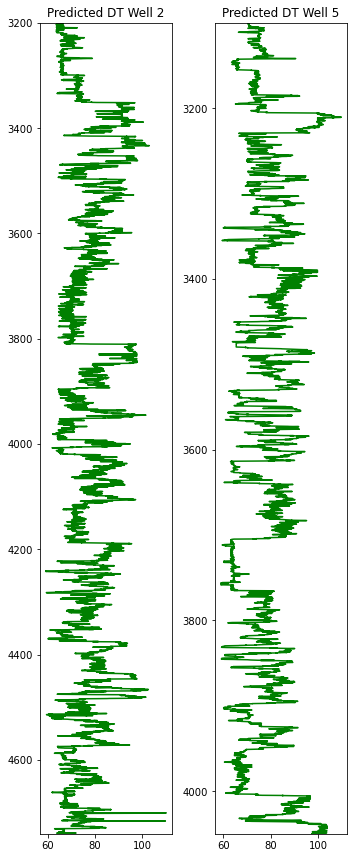

In [16]:
plt.figure(figsize=(5,12))

plt.subplot(1,2,1)
plt.plot(y_pred2, depth2, color='green')
plt.ylim(max(depth2), min(depth2))
plt.title('Predicted DT Well 2', size=12)

plt.subplot(1,2,2)
plt.plot(y_pred5, depth5, color='green')
plt.ylim(max(depth5), min(depth5))
plt.title('Predicted DT Well 5', size=12)

plt.tight_layout(1)
plt.show()

In [17]:
well_2['DT'] = y_pred2
well_5['DT'] = y_pred5

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_5972/3384682397.py:32: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


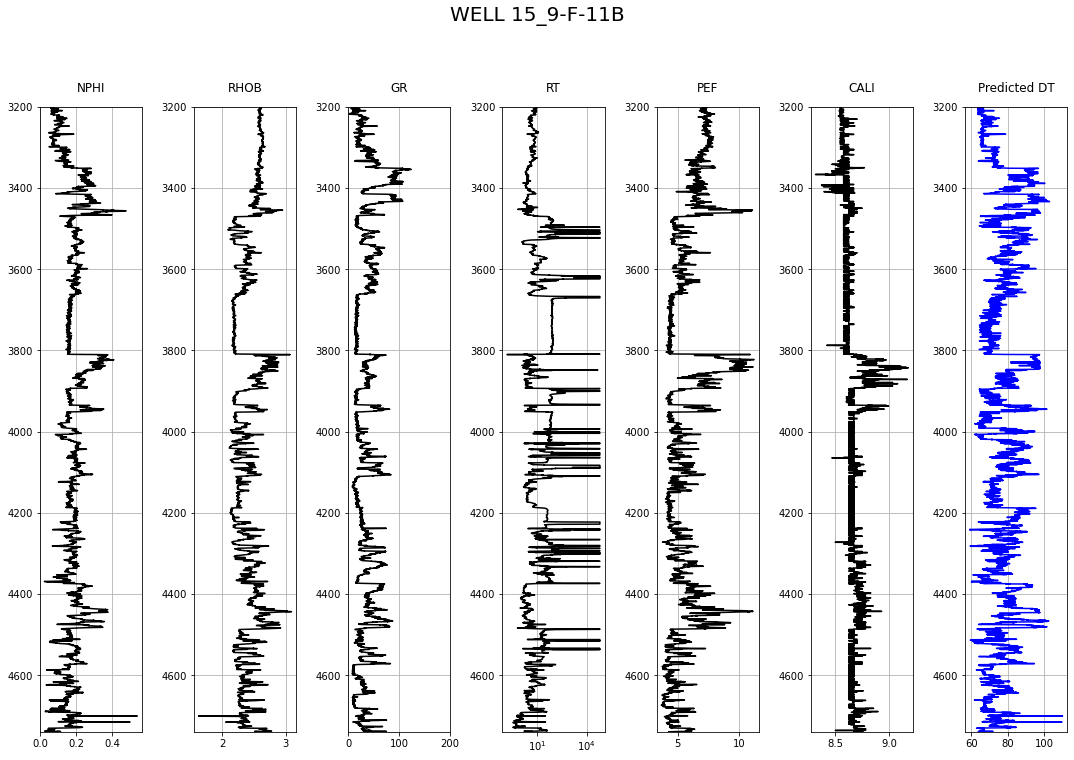

In [18]:
# Display the test data

def display_test_well(well,well_name):
    # define what logs are we going to us
    logs = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

    # titles to show
    title = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'Predicted DT']

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(15,10))
    fig.suptitle(f"WELL {well_name}", size=20, y=1.05)

    # looping each log to display in the subplots

    colors = ['black', 'black', 'black', 'black', 'black', 'black', 'blue']

    for i in range(len(logs)):
        if i == 3:
            # for resistivity, semilog plot
            ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
        else:
            # for non-resistivity, normal plot
            ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])

        ax[i].set_ylim(max(well['DEPTH']), min(well['DEPTH']))
        ax[i].set_title(title[i], pad=15)
        ax[i].grid(True)
      

    ax[2].set_xlim(0, 200)
    plt.tight_layout(1)
    plt.savefig('result.png')
    plt.show()
    
display_test_well(well_2,"15_9-F-11B")